In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from pandas import Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
model1 = KNeighborsClassifier(n_neighbors = 10)
model2 = DecisionTreeClassifier()
model3 = GaussianNB()

## 1) Importando os dados já tratados sem OneHotEncoding:

In [3]:
data = pd.read_csv("/Users/andrerodrigues/Google Drive/FIAP-MBA 8IA/006 - Modelos de IA e ML/Trabalho_Final_2/Exercicio8_v2/dados_clust_v2.csv", sep =",")
data = data.iloc[:,1:]
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,dbscan,kmeans,som
0,-122.23,452600.0,129,41,880,3,126,322,83.252,37.88,1,3,1
1,-122.22,358500.0,1106,21,7099,3,1138,2401,83.014,37.86,0,2,2
2,-122.24,352100.0,190,52,1467,3,177,496,72.574,37.85,1,3,1
3,-122.25,341300.0,235,52,1274,3,219,558,56.431,37.85,1,1,1
4,-122.25,342200.0,280,52,1627,3,259,565,38.462,37.85,1,1,1


## 2) Importando os dados já tratados com OneHotEncoding:

In [4]:
data_ohe = pd.read_csv("/Users/andrerodrigues/Google Drive/FIAP-MBA 8IA/006 - Modelos de IA e ML/Trabalho_Final_2/Exercicio8_v2/data_ohe_nostd_v2.csv", sep =",")
data_ohe = data_ohe.iloc[:,1:]
data_ohe["dbscan"] = data["dbscan"]
data_ohe["kmeans"] = data["kmeans"]
data_ohe["som"] = data["som"]
data_ohe.head()

,0,1,2,3,4,6,7,8,9,10,11,12,13,14,dbscan,kmeans,som
0,-122.23,452600.0,129.0,41.0,880.0,126.0,322.0,83.252,37.88,0.0,0.0,0.0,1.0,0.0,1,3,1
1,-122.22,358500.0,1106.0,21.0,7099.0,1138.0,2401.0,83.014,37.86,0.0,0.0,0.0,1.0,0.0,0,2,2
2,-122.24,352100.0,190.0,52.0,1467.0,177.0,496.0,72.574,37.85,0.0,0.0,0.0,1.0,0.0,1,3,1
3,-122.25,341300.0,235.0,52.0,1274.0,219.0,558.0,56.431,37.85,0.0,0.0,0.0,1.0,0.0,1,1,1
4,-122.25,342200.0,280.0,52.0,1627.0,259.0,565.0,38.462,37.85,0.0,0.0,0.0,1.0,0.0,1,1,1


#### a) Apenas como curiosidade, vejamos como as classes estão distribuidas em 'dbscan', 'kmeans' e 'som'

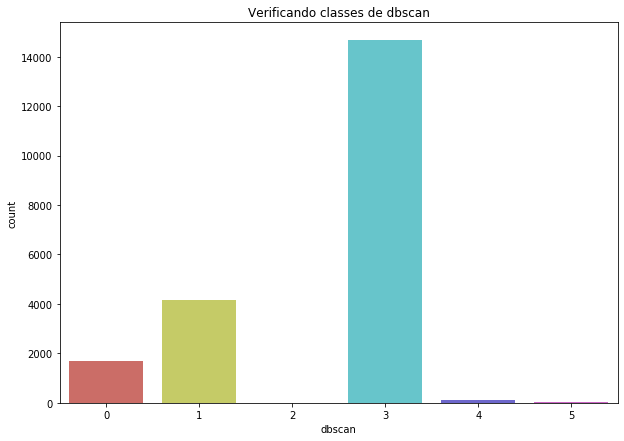

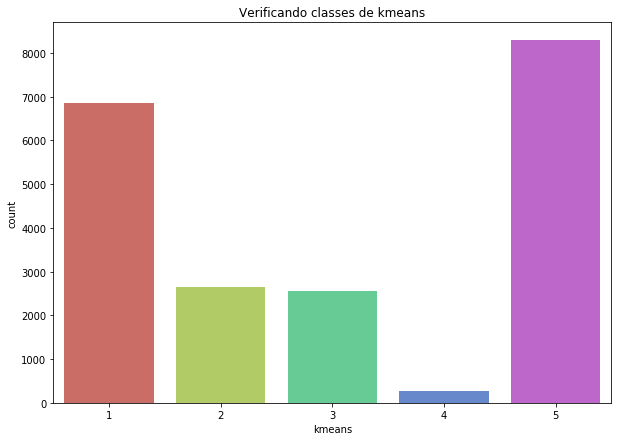

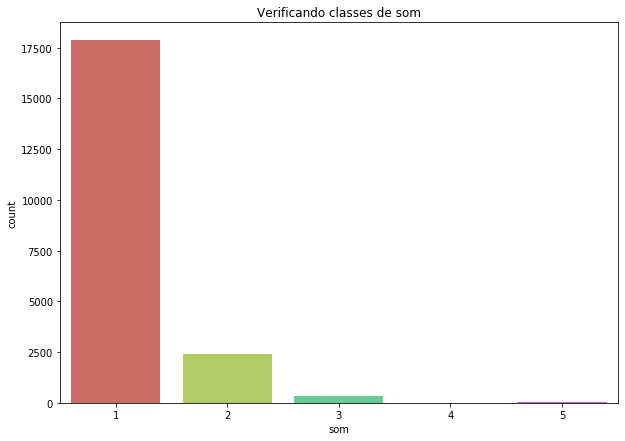

In [5]:
plt.figure(figsize=(10,7))
plot1 = sb.countplot(x='dbscan',data=data, palette='hls')
plt.title("Verificando classes de dbscan")
plt.show(plot1)
plt.figure(figsize=(10,7))
plot2 = sb.countplot(x='kmeans',data=data, palette='hls')
plt.title("Verificando classes de kmeans")
plt.show(plot2)
plt.figure(figsize=(10,7))
plot3 = sb.countplot(x='som',data=data, palette='hls')
plt.title("Verificando classes de som")
plt.show(plot3)

## 3) Seleciona o dataset para ser tratado pelo Modelo de Machine Learning e Separa as Classes

In [6]:
import traceback

def dataset_for_machine(dataset, target):
    
    # Tente receber o nome do arquivo
    try:
        d = dataset
        t = target
        
        
    
        if d == 'data':
            #No caso do DBSCAN, as amostras cujo o cluster for igual a 0, são consideradas outliers e não podemos considera-las como classe do problema.
            if t == 'dbscan':
                data.drop(data[data.dbscan == 0].index, inplace=True)
            # Troca o nome do dataset para df. A partir desse ponto, o dataset para ser tratado pelo modelo de ML será conhecido por df.
            df = data
            # Separa a classe
            classes = df[t]
            df.drop(columns=['dbscan','kmeans', 'som'], axis=1, inplace=True)


        elif d == 'data_ohe':
            #No caso do DBSCAN, as amostras cujo o cluster for igual a 0, são consideradas outliers e não podemos considera-las como classe do problema.
            if t == 'dbscan':
                data.drop(data[data.dbscan == 0].index, inplace=True)
            # Troca o nome do dataset para df. A partir desse ponto, o dataset para ser tratado pelo modelo de ML será conhecido por df.
            df = data_ohe
            # Separa a classe
            classes = df[t]
            df.drop(columns=['dbscan','kmeans', 'som'], axis=1, inplace=True)

        else:
            print("Escolha entre 'data' ou 'data_ohe'")
            exit

    # Se ocorrer um erro
    except:
        # Mostre na tela
        trace = traceback.format_exc()
        print ('Aconteceu um erro:\n', trace)
        # Encerre o programa
        raise SystemExit
        
    return df, classes
    
# df, classes = dataset_for_machine(input("Entre com o dataset que será tratado pela maquina('data' ou 'data_ohe') e o target('kmeans' ou 'som') separados por ',':"))
dataset = input("Entre com o dataset que será tratado pela maquina('data' ou 'data_ohe'):")
target = input("Entre com o target que será tratado pela maquina ('dbscan','kmeans' ou 'som'):")
df, classes = dataset_for_machine(dataset, target)

Entre com o dataset que será tratado pela maquina('data' ou 'data_ohe'): data_ohe
Entre com o target que será tratado pela maquina ('dbscan','kmeans' ou 'som'): som


* A partir desse ponto, o dataset para ser tratado pelo modelo de ML será conhecido por df. A seleção se ele vai ser passado com ou sem One Hot Encoding foi feita acima.

In [7]:
df.head()

,0,1,2,3,4,6,7,8,9,10,11,12,13,14
0,-122.23,452600.0,129.0,41.0,880.0,126.0,322.0,83.252,37.88,0.0,0.0,0.0,1.0,0.0
1,-122.22,358500.0,1106.0,21.0,7099.0,1138.0,2401.0,83.014,37.86,0.0,0.0,0.0,1.0,0.0
2,-122.24,352100.0,190.0,52.0,1467.0,177.0,496.0,72.574,37.85,0.0,0.0,0.0,1.0,0.0
3,-122.25,341300.0,235.0,52.0,1274.0,219.0,558.0,56.431,37.85,0.0,0.0,0.0,1.0,0.0
4,-122.25,342200.0,280.0,52.0,1627.0,259.0,565.0,38.462,37.85,0.0,0.0,0.0,1.0,0.0


In [8]:
classes

0        1
1        2
2        1
3        1
4        1
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: som, Length: 20640, dtype: int64

## 4) Separar o conjunto em variavel resposta e variaveis de treinamento

In [9]:
len(df.columns)

14

In [10]:
if len(df.columns) == 10:
    X = df.iloc[:,1:].values
    y = classes
else:
    X = df.iloc[:,1:].values
    y = classes
print(X)
print(y)

[[4.526e+05 1.290e+02 4.100e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 [3.585e+05 1.106e+03 2.100e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 [3.521e+05 1.900e+02 5.200e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 ...
 [9.230e+04 4.850e+02 1.700e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [8.470e+04 4.090e+02 1.800e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [8.940e+04 6.160e+02 1.600e+01 ... 0.000e+00 0.000e+00 0.000e+00]]
0        1
1        2
2        1
3        1
4        1
        ..
20635    1
20636    1
20637    1
20638    1
20639    1
Name: som, Length: 20640, dtype: int64


## 5) Normalizando os dados

In [11]:
XNew = StandardScaler().fit_transform(X)
Xold = X
X = XNew

## 6) Agora vamos dividir em treino e teste (teste com 30%)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

## 7)Testando cada modelo individualmente

### a) Testanto o knn apenas

In [13]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)
y_pred = y_pred_knn = knn.predict(X_test)


In [14]:
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99      5372
           2       0.96      0.91      0.93       697
           3       0.96      0.83      0.89       109
           4       0.00      0.00      0.00         1
           5       0.92      0.85      0.88        13

    accuracy                           0.98      6192
   macro avg       0.76      0.72      0.74      6192
weighted avg       0.98      0.98      0.98      6192

0.9846576227390181


/Users/andrerodrigues/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### b) Testanto Arvore de decisão  apenas

In [15]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = y_pred_dt = dt.predict(X_test)


In [16]:
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      0.98      0.98      5372
           2       0.86      0.87      0.86       697
           3       0.90      0.86      0.88       109
           4       0.00      0.00      0.00         1
           5       0.71      0.92      0.80        13

    accuracy                           0.97      6192
   macro avg       0.69      0.73      0.71      6192
weighted avg       0.97      0.97      0.97      6192

0.9681847545219638


/Users/andrerodrigues/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### c) Testanto Arvore de Naive Bayes

In [17]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = y_pred_nb = nb.predict(X_test)


In [18]:
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.65      0.78      5372
           2       0.26      0.94      0.40       697
           3       0.64      0.70      0.67       109
           4       0.25      1.00      0.40         1
           5       0.26      0.77      0.39        13

    accuracy                           0.68      6192
   macro avg       0.48      0.81      0.53      6192
weighted avg       0.91      0.68      0.74      6192

0.6797480620155039


## 10) Esemble baseado em voto marjoritário

In [19]:
model = VotingClassifier(estimators=[('knn', model1), ('dt', model2), ('gnb', model3)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9785206718346253

## 11) Ensemble baseado em pesos e na probabilidade da classes

In [20]:
knn.fit(X_train,y_train)
nb.fit(X_train,y_train)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [21]:
pred1=knn.predict_proba(X_test)
pred2=nb.predict_proba(X_test)
pred3=dt.predict_proba(X_test)

In [22]:
finalpred=(pred1*0.5+pred2*0.2+pred3*0.3)

In [23]:
for i in range(0, len(finalpred[:,1])):
    if finalpred[i,0] > finalpred[i,1]:
        y_pred[i] = 0
    else:
        y_pred[i] = 1
        
print(metrics.accuracy_score(y_test, y_pred))

0.00904392764857881


## 12) Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
modelRfc= RandomForestClassifier(random_state=1)
modelRfc.fit(X_train, y_train)
modelRfc.score(X_test,y_test)

/Users/andrerodrigues/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9794896640826873

#### a) Exibe as caracteristicas mais relevantes para o ramdom forest

In [25]:
for i, j in sorted(zip(df.iloc[:,1:].columns, modelRfc.feature_importances_)):
    print(i, j)

1 0.040622285884831494
10 0.01239686282789175
11 0.008579471194695943
12 0.0
13 0.014095510475958481
14 0.008483018245571749
2 0.12815859487096135
3 0.05272105699261159
4 0.15220108605039287
6 0.33529650478010975
7 0.15533277607048168
8 0.04110776771614875
9 0.0510050648903446


## 13) Boosting utilizando  o algoritmo AdaBoost

In [26]:
from sklearn.ensemble import AdaBoostClassifier
modelADB = AdaBoostClassifier(random_state=1, n_estimators = 25)
modelADB.fit(X_train, y_train)
modelADB.score(X_test,y_test)

0.9208656330749354

## 14) Verificando os resultados obtidos

 * Usando o dataset:data e a clusterizacao:dbscan, obtemos o seguintes resultados: 
  + KNN sozinho = 0.9992967651195499 
  + Decision Tree sozinho = 0.9992967651195499 
  + Naive Baynes sozinho = 0.9980661040787623
  + Esemble baseado em voto marjoritário = 0.999648382559775 
  + Ensemble baseado em pesos e na probabilidade da classes = 0.00017580872011251758 
  + Random Forest = 0.9991209563994374 
  + Boosting utilizando o algoritmo AdaBoost = 0.9931434599156118

* Usando o dataset:data e a clusterizacao:kmeans, obtemos o seguintes resultados: 
  + KNN sozinho = 0.9568798449612403 
  + Decision Tree sozinho = 0.9526808785529716 
  + Naive Baynes sozinho = 0.9231266149870802 
  + Esemble baseado em voto marjoritário = 0.9602713178294574 
  + Ensemble baseado em pesos e na probabilidade da classes = 0.002583979328165375 
  + Random Forest = 0.9646317829457365 
  + Boosting utilizando o algoritmo AdaBoost = 0.7425710594315246 

* Usando o dataset:data e a clusterizacao:som, obtemos o seguintes resultados: 
  + KNN sozinho = 0.9865956072351422 
  + Decision Tree sozinho = 0.9728682170542635 
  + Naive Baynes sozinho = 0.9418604651162791 
  + Esemble baseado em voto marjoritário = 0.9832041343669251 
  + Ensemble baseado em pesos e na probabilidade da classes = 0.007267441860465116 
  + Random Forest = 0.9814276485788114 
  + Boosting utilizando o algoritmo AdaBoost = 0.9208656330749354 

* Usando o dataset:data_ohe e a clusterizacao:dbscan, obtemos o seguintes resultados: 
  + KNN sozinho = 0.9654392764857881 
  + Decision Tree sozinho = 0.959140826873385 
  + Naive Baynes sozinho = 0.9352390180878553
  + Esemble baseado em voto marjoritário = 0.9633397932816538 
  + Ensemble baseado em pesos e na probabilidade da classes = 0.2877906976744186 
  + Random Forest = 0.9672157622739018 
  + Boosting utilizando o algoritmo AdaBoost = 0.8107235142118863 

* Usando o dataset:data_ohe e a clusterizacao:kmeans, obtemos o seguintes resultados: 
  + KNN sozinho = 0.9547803617571059 
  + Decision Tree sozinho = 0.9536498708010336 
  + Naive Baynes sozinho = 0.8381782945736435 
  + Esemble baseado em voto marjoritário = 0.9536498708010336 
  + Ensemble baseado em pesos e na probabilidade da classes = 0.001937984496124031 
  + Random Forest = 0.962047803617571 
  + Boosting utilizando o algoritmo AdaBoost = 0.7425710594315246 

 * Usando o dataset:data_ohe e a clusterizacao:som, obtemos o seguintes resultados: 
  + KNN sozinho = 0.9846576227390181 
  + Decision Tree sozinho = 0.9678617571059431 
  + Naive Baynes sozinho = 0.6797480620155039 
  + Esemble baseado em voto marjoritário = 0.977390180878553 
  + Ensemble baseado em pesos e na probabilidade da classes = 0.009366925064599484 
  + Random Forest = 0.9794896640826873 
  + Boosting utilizando o algoritmo AdaBoost = 0.9208656330749354

* Os resultados de acurácia obtidos com o classificador SVM ficaram da seguinte maneira:
  + Label Encoding sozinho e DBSCAN = 100%
  + Label Encoding sozinho e K-Means = 97.45%
  + Label Encoding sozinho e SOM = 86.09%
  + Label Encoding + One Hot Encoding e K-Means = 97.39%
  + Label Encoding + One Hot Encoding e SOM = 85.14%

#### Até o final dessa etapa do exercicio, analizando todas combinações de pre-processamento, clusterizacao e classificacao, nossa decisão será por seguir com os dados tratados apenas com <b><span style="color:red">Label Encoding</span></b>, tendo o <b><span style="color:red">DBSCAN</span></b> como clusterizador e o <b><span style="color:red">KNN sozinho</span></b> como classificador, pois essa combinação obteve uma excelente relação custo computacional x score de acuracia (99.96%) rodando KNN tunning. 
##### Observe que o Ensemble baseado em voto majoritário teve o mesmo valor de acurácia (99.96%), mas nesse ultimo caso, precisariamos rodar o DT e NB além do KNN para chegar no mesmo valor.
##### O SVM com Label Encoding e DBSCAN obteve 100% de acurácia. Porém seu alto custo computacional quando comparado com o KNN, o desfavorece.